<a href="https://colab.research.google.com/github/tgp989/Integracion-de-datos-y-prospectiva/blob/main/Reto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teoría de la Credibilidad - FINTECH**

En este espacio de trabajo se plantea como caso de estudio un proceso de integración de datos aplicado a una FINTECH, bajo el enfoque de la Teoría de la Credibilidad.

Esta FINTECH busca llevar a cabo un proceso de integración de datos para utilizar diferentes métodos de análisis y enriquecer la información disponible. En particular, se propone integrar una base de datos interna con una base de datos externa, con el fin de obtener una caracterización más robusta de las pérdidas y mejorar la calidad de las estimaciones.

El proceso de integración contempla, en primer lugar, la caracterización de la distribución agregada de pérdidas para ambas bases de datos, utilizando medidas de tendencia central y de dispersión. Posteriormente, se estima la credibilidad de la base de datos externa con respecto a la base interna, evaluando el grado de afinidad entre ambas fuentes de información. Finalmente, se integran las dos bases de datos para realizar una caracterización consolidada de la distribución agregada de pérdidas.

Para el enriquecimiento de las bases de datos, se emplea el método de Montecarlo, el cual se basa en la estructura de variables aleatorias construidas a partir de histogramas de frecuencias. Este método permite simular escenarios y aproximar la distribución de pérdidas mediante técnicas de muestreo.

La Teoría de la Credibilidad se utiliza como herramienta central para determinar el peso relativo que debe asignarse a cada base de datos, de acuerdo con sus medidas de tendencia central y dispersión. De esta manera, se obtiene una estimación combinada que refleja de forma más precisa el comportamiento del riesgo analizado.

Los datos utilizados para el desarrollo del caso provienen de los archivos Fallos Tecnológicos.xlsx y AdmonEjecProcesos, los cuales sirven como insumo para el proceso de integración, simulación y análisis estadístico bajo el enfoque de credibilidad.

0. Cargar las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #Esta libreria para el trabajo estadístico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def caracterizacion(LDA):

  #Se procede con la creación de la distribución
  plt.figure(figsize=(10,5))
  sns.histplot(LDA,bins=10,kde=True)
  plt.xlabel("Pérdida (KUSD)")
  plt.grid()
  plt.show()

  #Se procede con la caracterización de cada una de las variables
  np.set_printoptions(suppress=True)
  NI=10    #Indica el número de clusters
  counts,bin_edges=np.histogram(LDA,bins=NI)
  print("El número de datos por intervalo es:")
  print(counts)
  print("Los intervalos inferiores:")
  print(bin_edges[:-1])
  print("Los intervalos superiores:")
  print(bin_edges[1:])
  XC=(bin_edges[:-1]+bin_edges[1:])/2

  #Se configura la tabla de los datos
  Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
  df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
  df.head(10)

  #Se procede con la estimación de la media
  fr=counts/np.sum(counts)
  u=np.sum(XC*fr)
  sigma2=np.sum(fr*(XC-u)**2)
  sigma=np.sqrt(sigma2)
  Cas=np.sum(fr*(XC-u)**3)/sigma**3
  Kur=(np.sum(fr*(XC-u)**4)/sigma**4)-3

  return u,sigma,Cas,Kur,df

1. Se cargan los archivos de trabajo

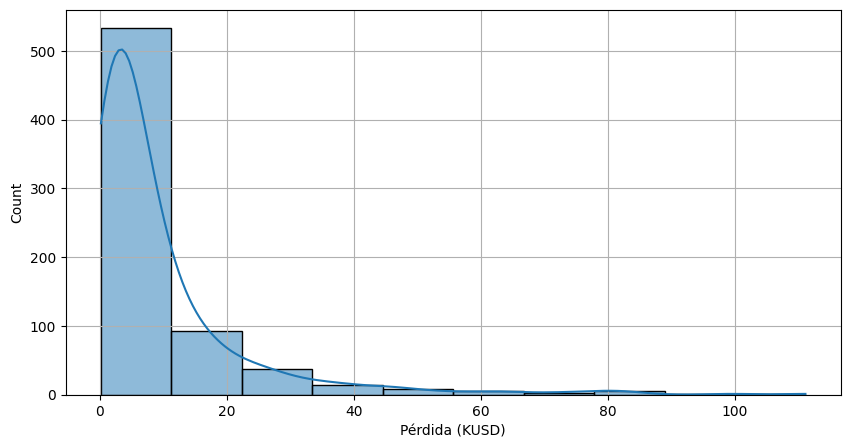

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
Los intervalos superiores:
[ 11.23637  22.33044  33.42451  44.51858  55.61265  66.70672  77.80079
  88.89486  99.98893 111.083  ]
La media de los datos observados es: 11.07019634094151
La desviación estándar de los datos observados es: 13.044113210589247
El coeficiente de asimetría de los datos observados es: 3.5824155186772604
La Kurtosis de los datos observados es: 15.266617247076205


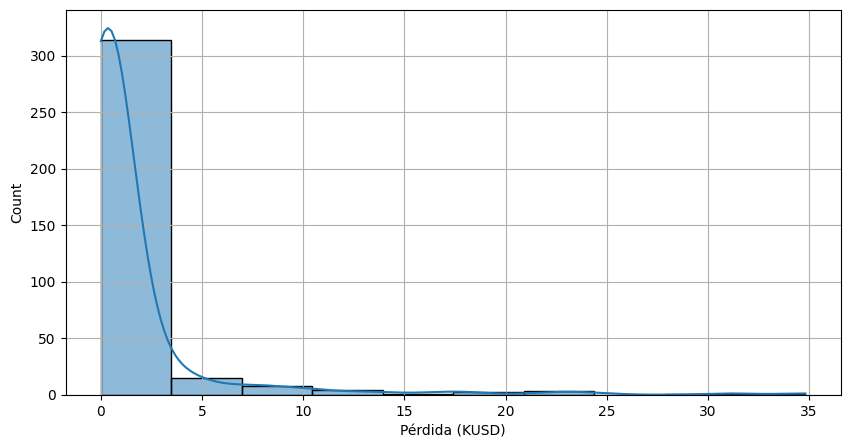

El número de datos por intervalo es:
[314  15   8   4   1   2   3   0   1   1]
Los intervalos inferiores:
[ 0.          3.48221562  6.96443124 10.44664686 13.92886248 17.4110781
 20.89329372 24.37550933 27.85772495 31.33994057]
Los intervalos superiores:
[ 3.48221562  6.96443124 10.44664686 13.92886248 17.4110781  20.89329372
 24.37550933 27.85772495 31.33994057 34.82215619]
La media de los datos externos es: 2.659055766504145
La desviación estándar de los datos externos es: 3.622796561426639
El coeficiente de asimetría de los datos externos es: 5.305045914196857
La Kurtosis de los datos externos es: 31.633643424630556
La credibilidad de la Base de Datos es: 0.010604763259661198
Se conoce como la franquicia de las pérdidas: 2.748253921039784


In [5]:
#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#1. Aquí se carga la base de datos interna (Datos Observados)
#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

nxl='/content/drive/MyDrive/integración de datos y prospectiva/Reto 2/1. FallasTecnológicas (1).xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)

#Procedemos con la construcción de la distribución agregada de las pérdidas
Freq=XDB.iloc[1:,3].astype(float);Sev=XDB.iloc[1:,4].astype(float);LDA=Freq*Sev

#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#2. Se procede con la carga de la base de datos (Datos Externos)
#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

nxle='/content/drive/MyDrive/integración de datos y prospectiva/Reto 2/2. AdmonEjecProcesos.xlsx'
XDBe=pd.read_excel(nxle,sheet_name=0)
XDBe.head(10)

Freqe=XDBe.iloc[1:,3].astype(float);Seve=XDBe.iloc[1:,4].astype(float);LDAe=Freqe*Seve

#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#3. Comparación Estadística (Media, Varianza, Desviación, Asimetría, Kurtosis)
#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#3.1 Base de Datos Observados
uo,sigmao,Caso,Kuro,dfo=caracterizacion(LDA)
print("La media de los datos observados es:",uo)
print("La desviación estándar de los datos observados es:",sigmao)
print("El coeficiente de asimetría de los datos observados es:",Caso)
print("La Kurtosis de los datos observados es:",Kuro)

#3.2 Bases de Datos Externas
ue,sigmae,Case,Kure,dfe=caracterizacion(LDAe)
print("La media de los datos externos es:",ue)
print("La desviación estándar de los datos externos es:",sigmae)
print("El coeficiente de asimetría de los datos externos es:",Case)
print("La Kurtosis de los datos externos es:",Kure)

#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#4. Teoría de Credibilidad
#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#4.1 Media Hipótetica
NDo=len(LDA);NDe=len(LDAe) # Para saber la inercia de los datos
uhat=(NDo*uo+NDe*ue)/(NDo+NDe)

#4.2 EPV: Valor Esperado de la Varianza
EPV=(NDo*sigmao**2+NDe*sigmae**2)/(NDo+NDe) # Determinar la varianza conjunta de los datos

#4.3 VHM: Varianza Hipótetica de la Media
VHM=((NDo*uo**2+NDe*ue**2)/(NDo+NDe))-uhat**2

#4.4 Factor de Credibilidad
fc=EPV/VHM

#4.5 Credibilidad de la Base de Datos
Cr=1-(NDo/(NDo+fc))
print("La credibilidad de la Base de Datos es:",Cr)

#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#5. Parametros de Riesgo
#'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#5.1 Perdidas Asumibles (Media:Franquicia)
PEs=Cr*uo+(1-Cr)*ue
print("Se conoce como la franquicia de las pérdidas:",PEs)


**Análisis de credibilidad**
Con base en los estadísticos calculados, los datos observados presentan una media de 11,0702 y una desviación estándar de 13,0441, lo que evidencia un nivel importante de dispersión respecto al promedio. El coeficiente de asimetría es 3,5824, indicando una marcada asimetría positiva, es decir, una mayor concentración de valores pequeños con presencia de eventos extremos hacia la derecha. Asimismo, la curtosis alcanza 15,2666, lo que refleja una distribución leptocúrtica, con colas pesadas y alta probabilidad de valores atípicos.

Por su parte, los datos externos muestran una media considerablemente menor, de 2,6591, y una desviación estándar de 3,6228, lo que indica un menor nivel absoluto de pérdidas y de dispersión en comparación con la base observada. Sin embargo, el coeficiente de asimetría es 5,3050, superior al de los datos internos, lo que sugiere una concentración aún mayor de valores pequeños acompañada de eventos extremos más pronunciados. La curtosis es 31,6336, evidenciando colas extremadamente pesadas y una mayor propensión a valores atípicos severos.

En conjunto, las diferencias en media, dispersión y especialmente en las medidas de forma (asimetría y curtosis) indican que ambas bases de datos presentan comportamientos estadísticos significativamente distintos. Esto se refleja en el coeficiente de credibilidad estimado, igual a 0,0106 (aproximadamente 1,06%), lo que implica que la base de datos externa aporta un peso muy reducido en la estimación combinada. En consecuencia, la mayor parte de la inferencia debe sustentarse en la base de datos observada, dado que la información externa muestra baja afinidad estadística frente a la interna.


# Integración por credibilidad de la base de datos

In [8]:
import numpy as np
import pandas as pd

# 1. Determina el número total de muestras para la distribución combinada
total_samples = len(LDA) + len(LDAe)
print(f"Número total de muestras para la distribución combinada: {total_samples}")

# 2. Calcula el número de muestras a extraer de LDAe usando Cr
num_samples_LDAe = round(total_samples * Cr)
print(f"Número de muestras a extraer de LDAe: {num_samples_LDAe}")

# 3. Calcula el número de muestras a extraer de LDA
num_samples_LDA = total_samples - num_samples_LDAe
print(f"Número de muestras a extraer de LDA: {num_samples_LDA}")

# 4. Selecciona aleatoriamente el número calculado de muestras de la serie LDA
sampled_LDA = np.random.choice(LDA, size=num_samples_LDA, replace=True)

# 5. Selecciona aleatoriamente el número calculado de muestras de la serie LDAe
sampled_LDAe = np.random.choice(LDAe, size=num_samples_LDAe, replace=True)

# 6. Concatena estas dos selecciones de muestras
LDA_combined_array = np.concatenate((sampled_LDA, sampled_LDAe))

# 7. Convierte LDA_combined a una serie de pandas
LDA_combined = pd.Series(LDA_combined_array)

print("Distribución combinada (LDA_combined) creada con éxito.")
print(f"Longitud de LDA_combined: {len(LDA_combined)}")
print(LDA_combined.head())

Número total de muestras para la distribución combinada: 1050
Número de muestras a extraer de LDAe: 11
Número de muestras a extraer de LDA: 1039
Distribución combinada (LDA_combined) creada con éxito.
Longitud de LDA_combined: 1050
0    27.6591
1     3.8620
2    26.1276
3    14.8090
4     3.1672
dtype: float64


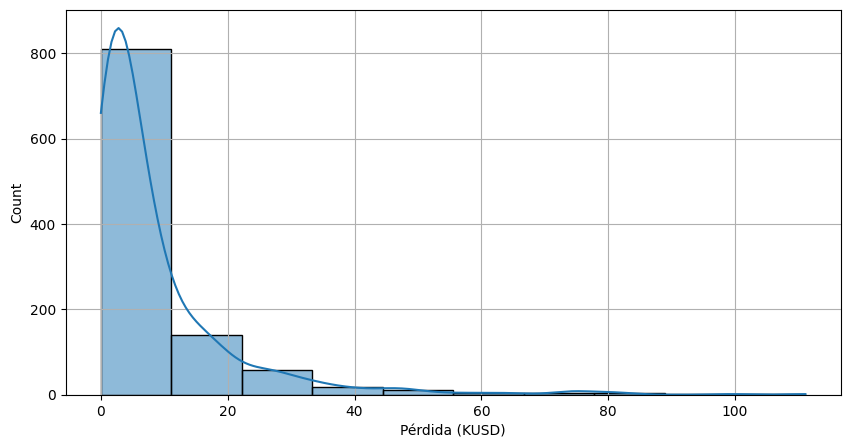

El número de datos por intervalo es:
[810 139  57  17  11   5   5   4   1   1]
Los intervalos inferiores:
[ 0.01473939 11.12156545 22.22839151 33.33521757 44.44204364 55.5488697
 66.65569576 77.76252182 88.86934788 99.97617394]
Los intervalos superiores:
[ 11.12156545  22.22839151  33.33521757  44.44204364  55.5488697
  66.65569576  77.76252182  88.86934788  99.97617394 111.083     ]
La media de la distribución combinada es: 10.30706487502844
La desviación estándar de la distribución combinada es: 11.628007710007573
El coeficiente de asimetría de la distribución combinada es: 3.7526061151161034
La Kurtosis de la distribución combinada es: 17.6927650263113


In [10]:
uo_combined, sigmao_combined, Caso_combined, Kuro_combined, dfo_combined = caracterizacion(LDA_combined)
print("La media de la distribución combinada es:", uo_combined)
print("La desviación estándar de la distribución combinada es:", sigmao_combined)
print("El coeficiente de asimetría de la distribución combinada es:", Caso_combined)
print("La Kurtosis de la distribución combinada es:", Kuro_combined)

Con base en el coeficiente de credibilidad estimado (≈ 1,06%), se realizó la combinación de ambas bases de datos, otorgando un peso predominante a la información observada y un aporte marginal a la información externa.

Como resultado, la **media de la distribución combinada** es 10,3071, valor ligeramente inferior a la media de los datos observados, lo cual es consistente con la incorporación —aunque mínima— de la base externa, que presentaba un promedio menor.

La **desviación estándar** se ubica en 11,6280, mostrando una reducción frente a la dispersión original de los datos observados, lo que indica un leve efecto estabilizador producto de la combinación.

En cuanto a las medidas de forma, el **coeficiente de asimetría** es 3,7526, lo que confirma que la distribución combinada mantiene una marcada asimetría positiva, característica típica de distribuciones de pérdidas con presencia de eventos extremos.

Por su parte, la **curtosis** alcanza 17,6928, evidenciando que la distribución continúa siendo leptocúrtica, con colas pesadas y alta probabilidad de valores atípicos severos. Incluso se observa un ligero incremento respecto a la base interna, lo que sugiere que, aunque el peso de la base externa es reducido, su alta curtosis influye en el comportamiento de las colas.

En síntesis, la distribución combinada conserva esencialmente la estructura estadística de la base observada —debido al bajo nivel de credibilidad asignado a la base externa—, pero incorpora un ajuste marginal que modifica levemente el nivel promedio, la dispersión y especialmente la intensidad de las colas.


# Integración directa

In [15]:
LDA_direct_combined_array = np.concatenate((LDA, LDAe))
LDA_direct_combined = pd.Series(LDA_direct_combined_array)

print("LDA_direct_combined created successfully.")
print(f"Length of LDA_direct_combined: {len(LDA_direct_combined)}")
print(LDA_direct_combined.head())

LDA_direct_combined created successfully.
Length of LDA_direct_combined: 1050
0    0.5374
1    4.7912
2    2.1345
3    6.4884
4    8.4735
dtype: float64


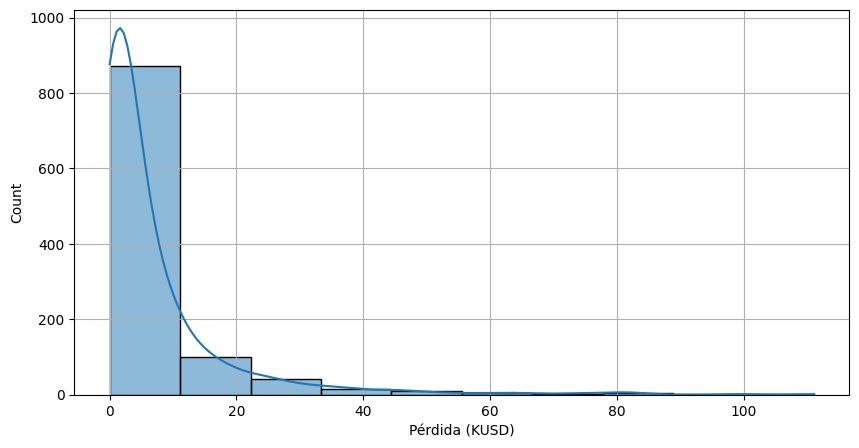

El número de datos por intervalo es:
[871  99  41  15   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.     11.1083 22.2166 33.3249 44.4332 55.5415 66.6498 77.7581 88.8664
 99.9747]
Los intervalos superiores:
[ 11.1083  22.2166  33.3249  44.4332  55.5415  66.6498  77.7581  88.8664
  99.9747 111.083 ]
La media de la distribución combinada directa es: 9.330972000000001
La desviación estándar de la distribución combinada directa es: 11.074500505394484
El coeficiente de asimetría de la distribución combinada directa es: 4.355098396267408
La Kurtosis de la distribución combinada directa es: 23.076528605538343


In [16]:
uo_direct_combined, sigmao_direct_combined, Caso_direct_combined, Kuro_direct_combined, dfo_direct_combined = caracterizacion(LDA_direct_combined)
print("La media de la distribución combinada directa es:", uo_direct_combined)
print("La desviación estándar de la distribución combinada directa es:", sigmao_direct_combined)
print("El coeficiente de asimetría de la distribución combinada directa es:", Caso_direct_combined)
print("La Kurtosis de la distribución combinada directa es:", Kuro_direct_combined)

Con la **integración directa** de ambas bases de datos (LDA y LDAe), la distribución combinada (`LDA_direct_combined`) presenta las siguientes características:

La **media** de la distribución combinada directa es de 9,3310. Este valor es intermedio entre las medias de los datos observados (11,0702) y los datos externos (2,6591), y es notablemente inferior a la media de la distribución combinada por credibilidad (10,3071). Esto se debe a que, en la combinación directa, se otorga el mismo peso (o peso proporcional al número de datos) a ambas fuentes, incluyendo la base externa con su media significativamente menor.

La **desviación estándar** es de 11,0745. Este valor es también inferior a la desviación estándar de los datos observados (13,0441) y ligeramente inferior a la de la distribución combinada por credibilidad (11,6280). La inclusión de la base de datos externa, con su menor dispersión, contribuye a reducir la variabilidad general de la distribución resultante.

El **coeficiente de asimetría** es 4,3551, lo que indica una asimetría positiva muy pronunciada. Este valor es superior tanto al de los datos observados (3,5824) como al de la distribución combinada por credibilidad (3,7526). Esto se explica por la fuerte asimetría de la base de datos externa (5,3050), que, al combinarse directamente, influye más en la forma de la distribución agregada.

La **curtosis** alcanza un valor de 23,0765, mostrando una distribución extremadamente leptocúrtica, con colas muy pesadas y una alta probabilidad de eventos extremos. Este valor es superior al de los datos observados (15,2666) y también al de la distribución combinada por credibilidad (17,6928). La elevada curtosis de la base de datos externa (31,6336) tiene un impacto más significativo en la curtosis de la distribución combinada directa, evidenciando una mayor concentración de datos alrededor de la media y colas más pronunciadas.

En resumen, la combinación directa resulta en una distribución con una media y desviación estándar más bajas que la credibilidad-ponderada, y con una asimetría y curtosis más extremas, debido a la influencia sin ponderación de la distribución externa, que presenta características más acentuadas en estas medidas de forma.

## Comparación de Métodos de Integración

In [17]:
data = {
    'Medida': ['Media', 'Desviación Estándar', 'Asimetría', 'Curtosis'],
    'LDA_combined (Credibilidad)': [uo_combined, sigmao_combined, Caso_combined, Kuro_combined],
    'LDA_direct_combined (Directa)': [uo_direct_combined, sigmao_direct_combined, Caso_direct_combined, Kuro_direct_combined]
}

df_comparison = pd.DataFrame(data)
print("Comparación de Estadísticos Descriptivos de las Distribuciones Combinadas:")
print(df_comparison.to_string(index=False))

Comparación de Estadísticos Descriptivos de las Distribuciones Combinadas:
             Medida  LDA_combined (Credibilidad)  LDA_direct_combined (Directa)
              Media                    10.307065                       9.330972
Desviación Estándar                    11.628008                      11.074501
          Asimetría                     3.752606                       4.355098
           Curtosis                    17.692765                      23.076529


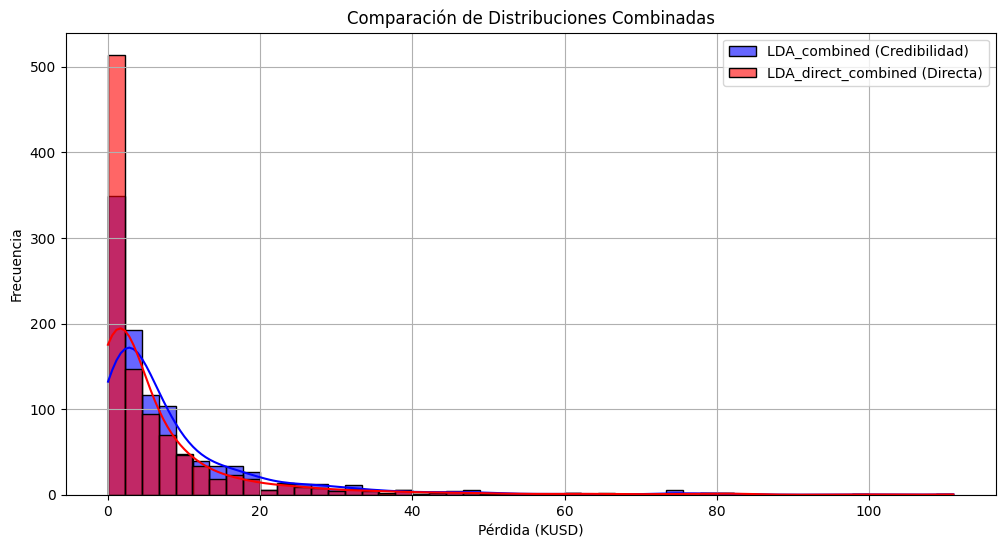

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(LDA_combined, bins=50, kde=True, color='blue', label='LDA_combined (Credibilidad)', alpha=0.6)
sns.histplot(LDA_direct_combined, bins=50, kde=True, color='red', label='LDA_direct_combined (Directa)', alpha=0.6)
plt.title('Comparación de Distribuciones Combinadas')
plt.xlabel('Pérdida (KUSD)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

### Análisis y Discusión de los Métodos de Integración

**1. Diferencias Observadas entre las Distribuciones Combinadas (Credibilidad vs. Directa):**

Al comparar `LDA_combined` (credibilidad) y `LDA_direct_combined` (directa) se observan las siguientes diferencias:

*   **Media:** La media de la distribución combinada por credibilidad (10.31) es más alta que la de la integración directa (9.33). Esto se debe a que la integración por credibilidad asigna un peso muy bajo a la base de datos externa (Cr = 0.0106), cuya media (2.66) es significativamente menor que la de la base interna (11.07). Por lo tanto, la `LDA_combined` se asemeja más a la base interna original. En contraste, la integración directa diluye más la media de la base interna al promediar directamente con la media más baja de la base externa, resultando en un valor más cercano al promedio ponderado por el número de datos.

*   **Desviación Estándar:** La desviación estándar de `LDA_combined` (11.63) es ligeramente mayor que la de `LDA_direct_combined` (11.07). Esto se relaciona con el mismo principio de ponderación: la credibilidad le da mayor peso a la base interna que tiene una desviación estándar más alta (13.04) que la externa (3.62), mientras que la directa permite una mayor influencia de la menor variabilidad de la base externa.

*   **Asimetría:** `LDA_combined` presenta una asimetría positiva de 3.75, menor que la de `LDA_direct_combined` (4.36). Esto indica que la integración directa amplifica la asimetría, dado que la base externa tiene una asimetría (5.31) mucho más pronunciada que la interna (3.58). El método de credibilidad modera este efecto al reducir la influencia de la base externa.

*   **Curtosis:** La curtosis de `LDA_combined` (17.69) es considerablemente menor que la de `LDA_direct_combined` (23.08). La base externa muestra una curtosis extremadamente alta (31.63). En la integración directa, esta característica extrema de la base externa se transmite con mayor fuerza a la distribución combinada, resultando en colas mucho más pesadas. El método de credibilidad, al ponderar la base externa con un factor bajo, atenúa este impacto, produciendo una distribución con colas aún pesadas, pero menos extremas.

Visualmente, los histogramas refuerzan estas observaciones: `LDA_combined` se parece mucho más a la distribución original de los datos observados, con una cola derecha menos extendida que `LDA_direct_combined`.

**2. Influencia del Factor de Credibilidad:**

El factor de credibilidad (Cr) calculado en 0.0106 (aproximadamente 1.06%) es muy bajo. Esto significa que la teoría de la credibilidad asigna un peso muy pequeño a la información de la base de datos externa. En la práctica, esto resulta en que la distribución combinada por credibilidad (`LDA_combined`) es predominantemente influenciada por la base de datos interna (observada). Los parámetros estadísticos de `LDA_combined` son, por lo tanto, muy cercanos a los de la base interna, con solo un ajuste marginal causado por la incorporación limitada de la base externa. Este bajo coeficiente de credibilidad indica una baja afinidad estadística entre ambas fuentes de información, lo que justifica la mínima ponderación de los datos externos.

**3. Ventajas y Desventajas de Cada Método:**

**Método de Integración por Credibilidad (LDA_combined):**

*   **Ventajas:**
    *   **Ponderación Justificada:** Asigna un peso a la información externa basado en su similitud estadística con la información interna, lo que es metodológicamente robusto. Cuando las fuentes son muy diferentes, el peso de la fuente externa se reduce, evitando que distorsione excesivamente la información principal.
    *   **Mayor Confianza en Datos Internos:** Si la base de datos interna se considera más fiable o representativa del riesgo específico de la FINTECH, este método asegura que esta información tenga un peso predominante, lo que puede llevar a estimaciones más precisas para el contexto específico.
    *   **Estabilidad de Parámetros:** Tiende a producir parámetros combinados más estables y menos afectados por valores atípicos o características extremas de una base de datos externa poco representativa.

*   **Desventajas:**
    *   **Subutilización de Información Externa:** Si la credibilidad es muy baja, como en este caso, se desaprovecha gran parte de la información disponible en la base de datos externa, incluso si podría contener alguna señal útil que no se capture por las métricas estándar.
    *   **Complejidad:** Requiere el cálculo del factor de credibilidad, lo que añade un paso metodológico y una capa de complejidad en la interpretación.

**Método de Integración Directa (LDA_direct_combined):**

*   **Ventajas:**
    *   **Simplicidad:** Es un enfoque directo y fácil de implementar, simplemente concatenando los datos.
    *   **Mayor Volumen de Datos:** Resulta en una base de datos más grande para el análisis, lo que, en otras circunstancias, podría mejorar la robustez de las estimaciones si ambas bases de datos fueran homogéneas.
    *   **Inclusión Total:** Utiliza toda la información disponible de ambas fuentes sin ninguna ponderación implícita (más allá de la proporcionalidad del número de observaciones).

*   **Desventajas:**
    *   **Distorsión Potencial:** Si las bases de datos tienen características estadísticas muy diferentes (como en este caso, con la base externa teniendo una media mucho menor y asimetría/curtosis más extremas), la combinación directa puede generar una distribución que no represente adecuadamente el riesgo real de la FINTECH, mezclando poblaciones heterogéneas.
    *   **Menor Representatividad:** Puede diluir la señal de la base de datos más relevante (la interna) con ruido o información menos aplicable de la base externa, llevando a estimaciones menos precisas del riesgo intrínseco de la FINTECH.
    *   **Ampliación de Extremos:** Puede acentuar características extremas (como la curtosis y asimetría) si la base externa las posee en mayor grado, lo que podría llevar a una sobreestimación de la probabilidad de eventos severos si esta base externa no es completamente relevante.

**Conclusión para la FINTECH:**

Dado el bajo coeficiente de credibilidad y las marcadas diferencias estadísticas entre las dos bases de datos, el método de **integración por credibilidad** es el más adecuado para la FINTECH en este caso. Aunque se subutilice gran parte de la información externa, este método garantiza que la caracterización de las pérdidas se mantenga fiel a las características de los datos observados internamente, que presumiblemente son más relevantes para el perfil de riesgo de la FINTECH. La integración directa, por otro lado, distorsionaría significativamente la distribución, llevando a una caracterización menos precisa y potencialmente engañosa del riesgo, especialmente en las medidas de forma y en la media de las pérdidas. La FINTECH busca una caracterización *más robusta* y una *mejora en la calidad de las estimaciones*, y la credibilidad proporciona un marco para lograr esto de manera metodológicamente sólida al integrar información externa de forma cautelosa y justificada.